<a href="https://colab.research.google.com/github/Mazda35/Backward-Elimination/blob/master/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 92us/step - loss: 2.2071 - accuracy: 0.1955 - val_loss: 2.0250 - val_accuracy: 0.4685
Epoch 2/20
48000/48000 [==============================] - 4s 90us/step - loss: 1.9555 - accuracy: 0.4158 - val_loss: 1.7680 - val_accuracy: 0.6665
Epoch 3/20
48000/48000 [==============================] - 4s 89us/step - loss: 1.7238 - accuracy: 0.5554 - val_loss: 1.5155 - val_accuracy: 0.7417
Epoch 4/20
48000/48000 [==============================] - 4s 90us/step - loss: 1.5030 - accuracy: 0.6318 - val_loss: 1.2850 - val_accuracy: 0.7842
Epoch 5/20
48000/48000 [==============================] - 4s 89us/step - loss: 1.3124 - accuracy: 0.6744 - val_loss: 1.0940 - val_accuracy: 0.8105
Epoch 6/20
48000/48000 [==============================] - 4s 89us/step - loss: 1.1569 - accuracy: 0.7068 - val_loss: 0.9455 - val_accuracy: 0.8267
Epoch 7/20
48000/48000 [==============================] - 4s 88us/st

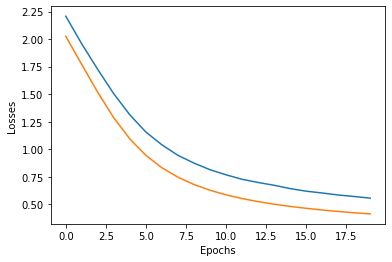

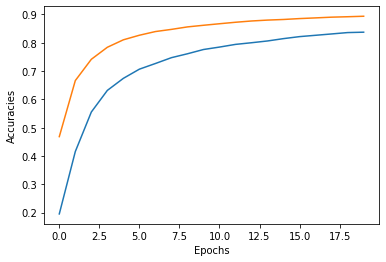

10000/10000 [==============================] - 1s 54us/step
[7 2 1 ... 4 5 6]


In [ ]:

from keras.datasets import mnist
import numpy as np

# Load data --------------------------------------
(trainImages,trainLabels),(testImages,testLabels)=mnist.load_data()

# Data attributes
# print('train images dimensions : ',trainImages.ndim)
# print('train images shape : ',trainImages.shape)
# print('train images type : ',trainImages.dtype)

# Plot Function ---------------------------------------
def plotHistory(netHistory):
    import matplotlib.pyplot as plt
    history=netHistory.history
    losses=history['loss']
    accuracies=history['accuracy']
    validationLosses=history['val_loss']
    validationAccuracies=history['val_accuracy']
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.plot(losses)
    plt.plot(validationLosses)
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.plot(accuracies)
    plt.plot(validationAccuracies)
    plt.show()

# preprocesing -----------------------------------------
xtrain=trainImages.reshape(60000,784)
xtest=testImages.reshape(10000,784)

xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain/=255
xtest/=255

from keras.utils import np_utils
ytrain=np_utils.to_categorical(trainLabels)
ytest=np_utils.to_categorical(testLabels)

# Creating model -------------------------------
from keras.models import Sequential
from keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(500,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

# model.summary()
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
model.compile(optimizer=SGD(lr=0.001), loss=categorical_crossentropy, metrics=['accuracy'])

# Model training -------------------------------------
network=model.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_split=0.2)
plotHistory(network)
# print(history)

# Evaluation ----------------------------------------
testLoss,testAcc=model.evaluate(xtest,ytest)
testLAbelPredict= model.predict(xtest)
import numpy as np
testLAbelPredict = np.argmax(testLAbelPredict, axis=1)
print(testLAbelPredict)






Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 10)                1569

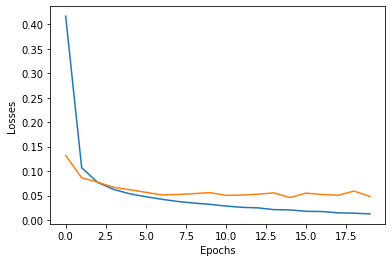

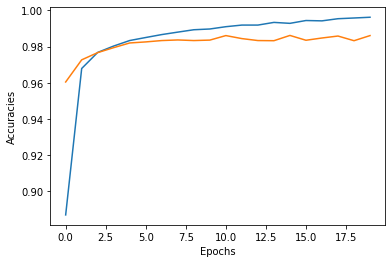

10000/10000 [==============================] - 3s 256us/step
[7 2 1 ... 4 5 6]


In [ ]:

from keras.datasets import mnist
import numpy as np

# Load data --------------------------------------
(trainImages,trainLabels),(testImages,testLabels)=mnist.load_data()

# Data attributes
# print('train images dimensions : ',trainImages.ndim)
# print('train images shape : ',trainImages.shape)
# print('train images type : ',trainImages.dtype)

# Plot Function ---------------------------------------
def plotHistory(netHistory):
    import matplotlib.pyplot as plt
    history=netHistory.history
    losses=history['loss']
    accuracies=history['accuracy']
    validationLosses=history['val_loss']
    validationAccuracies=history['val_accuracy']
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.plot(losses)
    plt.plot(validationLosses)
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.plot(accuracies)
    plt.plot(validationAccuracies)
    plt.show()

# preprocesing -----------------------------------------
xtrain=trainImages.reshape(60000,28,28,1)
xtest=testImages.reshape(10000,28,28,1)

xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain/=255
xtest/=255

from keras.utils import np_utils
ytrain=np_utils.to_categorical(trainLabels)
ytest=np_utils.to_categorical(testLabels)

# Creating model -------------------------------
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,Input,Flatten,Dense
import keras
input=Input(shape=(28,28,1))
conv1=Conv2D(16,(3,3),activation='relu',padding='same')(input)
pool1=MaxPooling2D(pool_size=2)(conv1)
conv2=Conv2D(32,(3,3),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D(pool_size=2)(conv2)
flat=Flatten()(pool2)
outLayer=Dense(10,activation='softmax')(flat)
model=Model(input,outLayer)

# model.summary()
from keras.losses import categorical_crossentropy
model.summary()
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

# Model training -------------------------------------
network=model.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_split=0.2)
plotHistory(network)

# Evaluation ----------------------------------------
# Evaluation ----------------------------------------
testLoss,testAcc=model.evaluate(xtest,ytest)
testLAbelPredict= model.predict(xtest)
import numpy as np
testLAbelPredict = np.argmax(testLAbelPredict, axis=1)
print(testLAbelPredict)






In [ ]:

from keras.datasets import mnist
import numpy as np

# Load data --------------------------------------
(trainImages,trainLabels),(testImages,testLabels)=mnist.load_data()

# Data attributes
# print('train images dimensions : ',trainImages.ndim)
# print('train images shape : ',trainImages.shape)
# print('train images type : ',trainImages.dtype)

# Plot Function ---------------------------------------
def plotHistory(netHistory):
    import matplotlib.pyplot as plt
    history=netHistory.history
    losses=history['loss']
    losses=history['val_loss']
    accuracies=history['accuracy']
    accuracies=history['val_accuracy']
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.plot(losses)
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.plot(accuracies)

# preprocesing -----------------------------------------
xtrain=trainImages.reshape(60000,28,28,1)
xtest=testImages.reshape(10000,28,28,1)

xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain/=255
xtest/=255

from keras.utils import np_utils
ytrain=np_utils.to_categorical(trainLabels)
ytest=np_utils.to_categorical(testLabels)

# Creating model -------------------------------
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,Input,Flatten,Dense
import keras
input=Input(shape=(28,28,1))
conv1=Conv2D(16,(3,3),activation='relu',padding='same',strides=2)(input)
# pool1=MaxPooling2D(pool_size=2)(conv1)
conv2=Conv2D(32,(3,3),activation='relu',padding='same',strides=2)(conv1)
# pool2=MaxPooling2D(pool_size=2)(conv2)
flat=Flatten()(conv2)
outLayer=Dense(10,activation='softmax')(flat)
model=Model(input,outLayer)

# model.summary()
from keras.losses import categorical_crossentropy
model.summary()
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

# Model training -------------------------------------
network=model.fit(xtrain,ytrain,batch_size=128,epochs=20)
plotHistory(network)

# Evaluation ----------------------------------------
testLoss,testAcc=model.evaluate(xtest,ytest)
testLAbelPredict= model.predict(xtest)
import numpy as np
testLAbelPredict = np.argmax(testLAbelPredict, axis=1)
print(testLAbelPredict)






Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.4384 - accuracy: 0.8841
Epoch 2/20
6000

KeyError: ignored

# New Section